# **OtterBots Group Project**

**Purpose**: To use methods learned in CST383 Into to Data Science class to create a model that will predict the intelligence/obedience of a dog using features.  These features an include group, height, weight, energy, demeanor, and derived values from them.

How accurate a model can we train that will predict the intelligence of a dog using selected features?

Source of the CSV files:


*   [Kaggle - Canine Intelligence and Size](https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=AKC+Breed+Info.csv) on Jan 31, 2023 (6pm)
*   [Github - akcdata by tmfilho](https://github.com/tmfilho/akcdata) on Feb 4, 2023 (5pm)









---


## **Import Libraries**

In [28]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---


## **Data Processing and Cleaning**



*   Create dataframes from the csv files



In [29]:
# URLs
breed_info_url="https://raw.githubusercontent.com/OtterBots/DoggieData/main/AKC_Breed_Info.csv"
intel_url = "https://raw.githubusercontent.com/OtterBots/DoggieData/main/dog_intelligence.csv"
groups_url = "https://raw.githubusercontent.com/OtterBots/DoggieData/main/akc-data-latest.csv"

In [30]:
# create dataframes
df1 = pd.read_csv(breed_info_url, index_col=0)
df2 = pd.read_csv(intel_url, index_col=0)
df3 = pd.read_csv(groups_url)

# Classification (df2) of 'obey' and reps
# Brightest Dogs                                   95%     1 to   4
# Excellent Working Dogs                           85%     5 to  15
# Above Average Working Dogs                       70%    16 to  25
# Average Working/Obedience Intelligence           50%    26 to  40
# Fair Working/Obedience Intelligence              30%    41 to  80
# Lowest Degree of Working/Obedience Intelligence   0%    81 to 100



*   Clean and prepare df3 for later merger.



In [31]:
# Cleaning up df3 for what is needed or possibly useful
df3.rename(columns={'Unnamed: 0': 'Breed'}, inplace=True)
df3 = df3[['Breed', 'group', 'energy_level_value', 'trainability_value', 'demeanor_value']] # 277,2
df3.drop(df3[df3['group'] == 'Foundation Stock Service'].index, inplace=True)
df3.dropna(inplace=True)

# Energy Level
# 1.0 Needs Lots of Activity
# 0.8 Energetic
# 0.6 Regular Exercise
# 0.4 Calm
# 0.2 Couch Potato

# Trainability
# 1.0 Eager to Please
# 0.8 Easy Training
# 0.6 Agreeable
# 0.4 Independent
# 0.2 May be Stubborn

# Demeanor
# 1.0 Outgoing
# 0.8 Friendy
# 0.6 Alert/Responsive
# 0.4 Reserved with Strangers
# 0.2 Aloof/Wary

*   Rename entries where a dog breed has many different spellings across the dataframes

In [32]:
# Fix different spellings of the same breed to increase useable entries

# Mismatched spelling of breeds that are affected by merger of df1 and df2 = dd
df1['Breed'] = df1['Breed'].str.replace('Airdale Terrier', 'Airedale Terrier')
df1['Breed'] = df1['Breed'].str.replace('Cocker Spaniel-American', 'Cocker Spaniel')
df1['Breed'] = df1['Breed'].str.replace('Cocker Spaniel-English', 'English Cocker Spaniel')
df1['Breed'] = df1['Breed'].str.replace('Collie \(Rough\) & \(Smooth\)', 'Collie')
df1['Breed'] = df1['Breed'].str.replace('Old English Sheepdog \(Bobtail\)', 'Old English Sheepdog')
df1['Breed'] = df1['Breed'].str.replace('Shetland Sheepdog \(Sheltie\)', 'Shetland Sheepdog')

df2['Breed'] = df2['Breed'].str.replace('Chinese Shar Pei', 'Chinese Shar-Pei')
df2['Breed'] = df2['Breed'].str.replace('Curly Coated Retriever', 'Curly-Coated Retriever')
df2['Breed'] = df2['Breed'].str.replace('Soft-coated Wheaten Terrier', 'Soft Coated Wheaten Terrier')

# Breeds affected by merger of dd and df3 = dd
df1['Breed'] = df1['Breed'].str.replace('Chinese Shar Pei', 'Chinese Shar-Pei')
df1['Breed'] = df1['Breed'].str.replace('Curly Coated Retriever', 'Curly-Coated Retriever')
df1['Breed'] = df1['Breed'].str.replace('Flat Coated Retriever', 'Flat-Coated Retriever')
df1['Breed'] = df1['Breed'].str.replace('Otter Hound', 'Otterhound')
df1['Breed'] = df1['Breed'].str.replace('Soft-Coated Wheaten Terrier', 'Soft Coated Wheaten Terrier')

# Breeds in that don't make an impact since they are not in df2
df1['Breed'] = df1['Breed'].str.replace('Anatolin Sheepdog', 'Anatolian Shepherd Dog')

<ipython-input-32-70ff234ee235>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Breed'] = df1['Breed'].str.replace('Collie \(Rough\) & \(Smooth\)', 'Collie')
<ipython-input-32-70ff234ee235>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Breed'] = df1['Breed'].str.replace('Old English Sheepdog \(Bobtail\)', 'Old English Sheepdog')
<ipython-input-32-70ff234ee235>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Breed'] = df1['Breed'].str.replace('Shetland Sheepdog \(Sheltie\)', 'Shetland Sheepdog')


*   Create new dataframe from merging the three initial dataframes on 'Breed' column

In [33]:
dd = pd.merge(df1,df2, on='Breed')
dd = pd.merge(dd, df3, on='Breed')



*   Replace all 'na', 'not found' to NaN



In [34]:
dd.replace({'na': 'not found'}, inplace=True)
dd.replace({'not found': np.nan}, inplace=True)



*   Drop entry ('Alaskan Malamute') because it is missing height and weight data



In [37]:
dd.dropna(subset=['height_low_inches'], inplace=True)
dd.reset_index(drop=True, inplace=True)



*   Convert height and weight columns to floats



In [36]:
dd['height_low_inches'] = dd['height_low_inches'].astype(str).astype(float)
dd['height_high_inches'] = dd['height_high_inches'].astype(str).astype(float)
dd['weight_low_lbs'] = dd['weight_low_lbs'].astype(str).astype(float)
dd['weight_high_lbs'] = dd['weight_high_lbs'].astype(str).astype(float)



*   Remove '%' from the 'obey' column
*   Convert 'obey' column to floats
*   Change nan in 'obey' to value 0 (these dogs are rated 0%)



In [39]:
# first remove the '%' character
dd['obey'] = dd['obey'].str.replace('%', '')

# then covert to float
dd['obey'] = dd['obey'].astype(float)

# change nan in 'obey' to 0
dd['obey'].fillna('0', inplace=True)

### **Adding Features**


*   Average weight
*   Average height
*   Average reps
*   Height to weight ratio





In [40]:
dd['weight_avg'] = (dd['weight_high_lbs'] + dd['weight_low_lbs']) / 2
dd['height_avg'] = (dd['height_high_inches'] + dd['height_low_inches']) / 2
dd['reps_avg'] = (dd['reps_lower'] + dd['reps_upper']) / 2
dd['height_to_weight'] = dd['height_avg'] / dd['weight_avg']



---


## **Data Exploration**

The final dateframe to be used for this project is 'dd' (113,17).

Columns are:


*   'Breed' (Object)
*   'height_low_inches' (float64)
*   'height_high_inches' (float64)
*   'weight_low_lbs' (float64)
*   'weight_high_lbs' (float64)
*   'Classification' (object)
*   'obey' (object)
*   'reps_lower' (int64)
*   'reps_upper' (int64)  
*   'group' (object)
*   'energy_level_value' (float64)
*   'trainability_value' (float64)
*   'demeanor_value' (float64)
*   'weight_avg' (float64)
*   'height_avg' (float64)
*   'reps_avg' (float64)
*   'height_to_weight' (float64)

In [43]:
# Distribution of dog groups within the data
breed_count = dd.groupby('group').size()
breed_perc = dd.groupby('group').size() / dd.shape[0]
print(breed_count)
print()
print(breed_perc)

# Herding Group         12  10.62%
# Hound Group           19  16.81%
# Non-Sporting Group    12  10.62%
# Sporting Group        23  20.35%
# Terrier Group         18  15.93%
# Toy Group             12  10.62%
# Working Group         17  15.04%

group
Herding Group         12
Hound Group           19
Non-Sporting Group    12
Sporting Group        23
Terrier Group         18
Toy Group             12
Working Group         17
dtype: int64

group
Herding Group         0.106195
Hound Group           0.168142
Non-Sporting Group    0.106195
Sporting Group        0.203540
Terrier Group         0.159292
Toy Group             0.106195
Working Group         0.150442
dtype: float64


In [47]:
# Distribution of 'Classification'
class_count = dd.groupby('Classification').size()
class_perc = dd.groupby('Classification').size() / dd.shape[0]
print(class_count)
print()
print(class_perc)

# CLASSIFICATION                                   count   perc
# Above Average Working Dogs                          25  22.12%
# Average Working/Obedience Intelligence              35  30.98%
# Brightest Dogs                                       8   7.08%
# Excellent Working Dogs                              18  15.93%
# Fair Working/Obedience Intelligence                 18  15.93%
# Lowest Degree of Working/Obedience Intelligence      9   7.96%

Classification
Above Average Working Dogs                          25
Average Working/Obedience Intelligence              35
Brightest Dogs                                       8
Excellent Working Dogs                              18
Fair Working/Obedience Intelligence                 18
Lowest Degree of Working/Obedience Intelligence      9
dtype: int64

Classification
Above Average Working Dogs                          0.221239
Average Working/Obedience Intelligence              0.309735
Brightest Dogs                                      0.070796
Excellent Working Dogs                              0.159292
Fair Working/Obedience Intelligence                 0.159292
Lowest Degree of Working/Obedience Intelligence     0.079646
dtype: float64


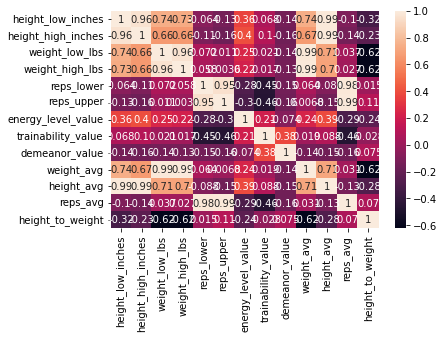

In [48]:
# Heatmap
dd_heatmap = dd
dd_heatmap = dd.drop(columns=['Breed', 'Classification', 'group'])

sns.heatmap(dd_heatmap.corr(), annot=True)

# There is high correlation between 'obey', 'reps_lower', 'reps_higher', and 'reps_avg' (which is the previous two average)
# What isn't seen on the heatmap is that 'Classification' is also highly correlated.
# We only need one of them for data exploration.

57.0
              Breed  height_avg
73           Vizsla        57.0
5        Great Dane        32.0
7   Irish Wolfhound        31.5


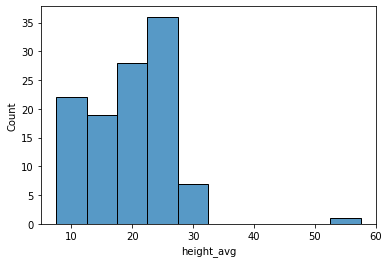

In [49]:
# What are the ranges of height around the average?

sns.histplot(x='height_avg', data=dd, binwidth=5)
print(dd['height_avg'].max())

dd_sorted = dd.sort_values(by='height_avg', ascending=False).head(3)

print(dd_sorted[['Breed', 'height_avg']])

# Great Danes and Irish Wolfhounds are some of the tallest breeds.
# A Vizsla is not almost double their height.  Thus it's height
# data is incorrect and the record should be dropped.

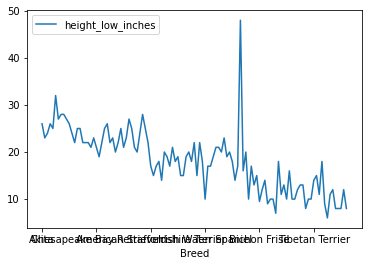

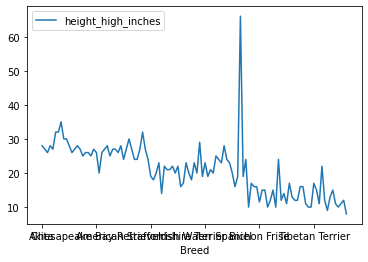

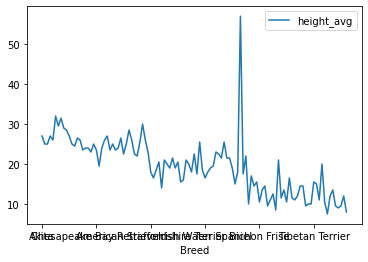

In [50]:
# Looking for oddities in the height data
dd_by_group = dd.sort_values(by='height_avg')

#add DataFrames to subplots
dd.plot(x='Breed', y='height_low_inches')
dd.plot(x='Breed', y='height_high_inches')
dd.plot(x='Breed', y='height_avg')
plt.show()

# Irish Water Spaniel has a low height of 10" but looking at the AKC website, it should be a low of 21
# this causes spikes in the plots when the data is sorted by the height_avg

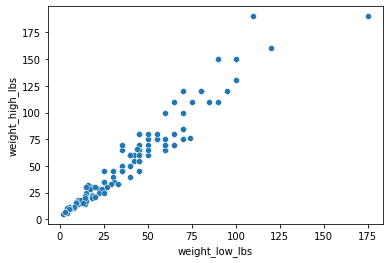

Breed                                                          Mastiff
height_low_inches                                                 27.0
height_high_inches                                                30.0
weight_low_lbs                                                   175.0
weight_high_lbs                                                  190.0
Classification        Lowest Degree of Working/Obedience Intelligence 
obey                                                               0.0
reps_lower                                                          81
reps_upper                                                         100
group                                                    Working Group
energy_level_value                                                 0.6
trainability_value                                                 0.6
demeanor_value                                                     0.6
weight_avg                                                       182.5
height

In [51]:
# Looking for oddities in weight data
sns.scatterplot(x='weight_low_lbs', y='weight_high_lbs', data=dd)
plt.show()

print(dd.loc[dd['weight_high_lbs'].idxmax()])
# Max. high weight dog is the 'Saint Bernard'.

print(dd.loc[dd['weight_low_lbs'].idxmax()])
# Max. low weight dog is the 'Mastiff'.

print(dd.loc[dd['weight_avg'].idxmax()])
# Max. avg weight dog is the 'Mastiff'.

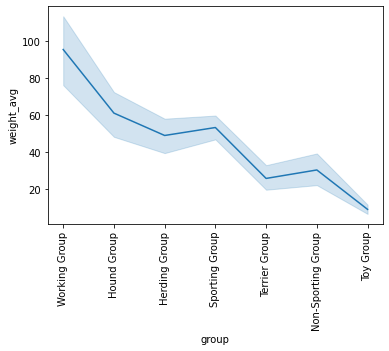

In [52]:
sns.lineplot(x='group', y='weight_avg', data=dd)
plt.xticks(rotation=90)
plt.show()

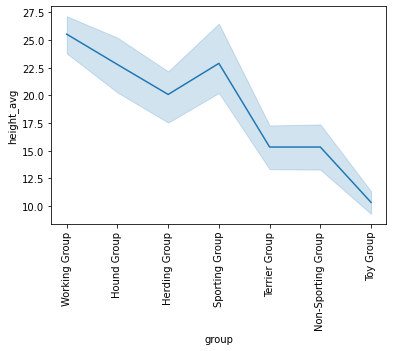

In [53]:
sns.lineplot(x='group', y='height_avg', data=dd)
plt.xticks(rotation=90)
plt.show()

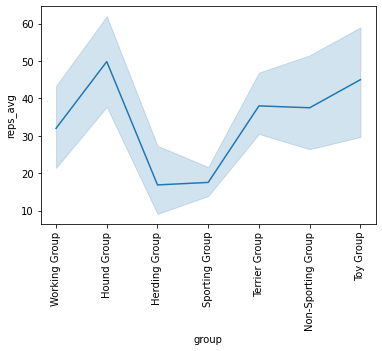

In [54]:
sns.lineplot(x='group', y='reps_avg', data=dd)
plt.xticks(rotation=90)
plt.show()

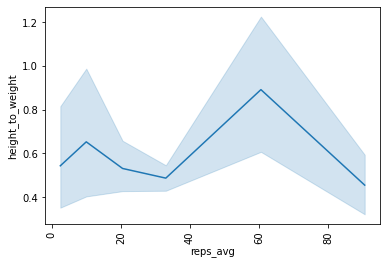

In [55]:
sns.lineplot(x='reps_avg', y='height_to_weight', data=dd)
plt.xticks(rotation=90)
plt.show()



---

## **Modeling**



---

## **Evaluation**



---

## **Make a report and video????**
also update github stuff?  so much to do.